

> # Salários Profissionais de Data Science 2023



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

pd.set_option('display.max_rows', 10000)
df = pd.read_csv("ds_salaries.csv")
#teste
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [3]:
len(df)

3755

In [4]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.duplicated().sum()

np.int64(1171)

In [6]:
df = df.drop('salary', axis=1)
df.head(50)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M


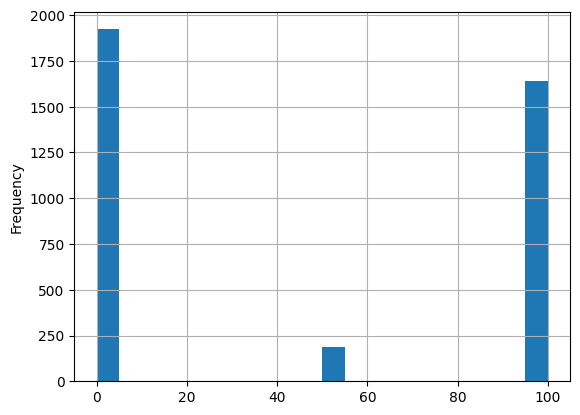

In [7]:
hist =  df.remote_ratio.plot.hist(bins=20)
plt.grid()

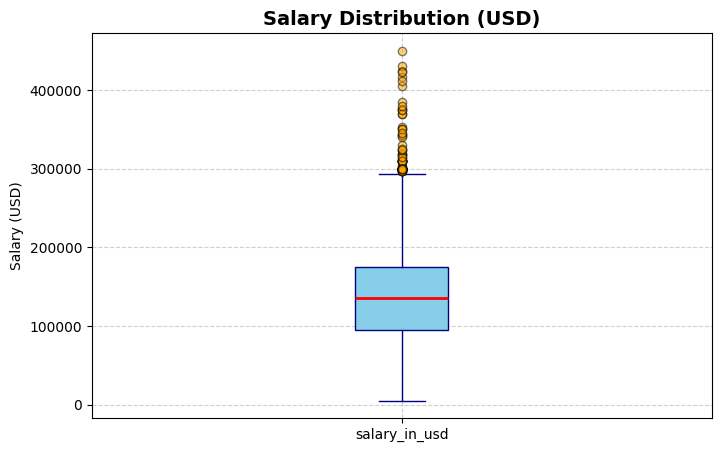

Primeiro quartil:  95000.0
Segundo quartil:  135000.0
Terceiro quartil:  175000.0
Limite superior :  295000.0
Limite inferior :  -25000.0


In [8]:
plt.figure(figsize=(8, 5))
box = df.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

q1 = df['salary_in_usd'].quantile(.25)
q2 = df['salary_in_usd'].quantile(.50)
q3 = df['salary_in_usd'].quantile(.75)

print("Primeiro quartil: ", q1)
print("Segundo quartil: ", q2)
print("Terceiro quartil: ", q3)

iqr = q3 - q1

superior = q3 + 1.5 * iqr
inferior = q1 - 1.5 * iqr

print("Limite superior : ", superior)
print("Limite inferior : ", inferior)


Df tem o seguinte numero de outliers:  63


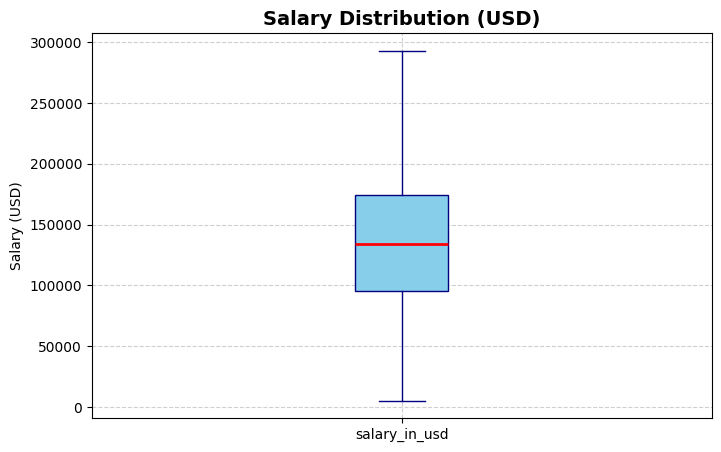

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,USD,342810,US,0,US,M
68,2023,SE,FT,Applied Scientist,USD,309400,US,0,US,L
83,2022,EN,FT,AI Developer,USD,300000,IN,50,IN,L
133,2023,SE,FT,Machine Learning Engineer,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,USD,318300,US,100,US,M


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


63


In [9]:
dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]
print("Df tem o seguinte numero de outliers: ",len(df)-len(dfSemOutlier))
plt.figure(figsize=(8, 5))
box = dfSemOutlier.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

dfApenasOutlier = df.loc[df['salary_in_usd'] >= superior]
display(dfApenasOutlier.head(5))
display(df.head(5))
print(len(dfApenasOutlier))


A variável "experience_level" possui 4 valores únicos
A variável "employment_type" possui 4 valores únicos
A variável "job_title" possui 93 valores únicos
A variável "salary_currency" possui 20 valores únicos
A variável "employee_residence" possui 78 valores únicos
A variável "company_location" possui 72 valores únicos
A variável "company_size" possui 3 valores únicos

{'Power BI Developer': 1, 'Product Data Scientist': 2, '3D Computer Vision Researcher': 3, 'Staff Data Analyst': 4, 'Product Data Analyst': 5, 'Autonomous Vehicle Technician': 6, 'Compliance Data Analyst': 7, 'Principal Data Architect': 8, 'Machine Learning Research Engineer': 9, 'Insight Analyst': 10, 'AI Scientist': 11, 'Data DevOps Engineer': 12, 'BI Data Analyst': 13, 'AI Programmer': 14, 'Business Data Analyst': 15, 'BI Data Engineer': 16, 'Big Data Engineer': 17, 'Finance Data Analyst': 18, 'Software Data Engineer': 19, 'Data Analytics Engineer': 20, 'Marketing Data Engineer': 21, 'Lead Data Analyst': 22, 'Data Man

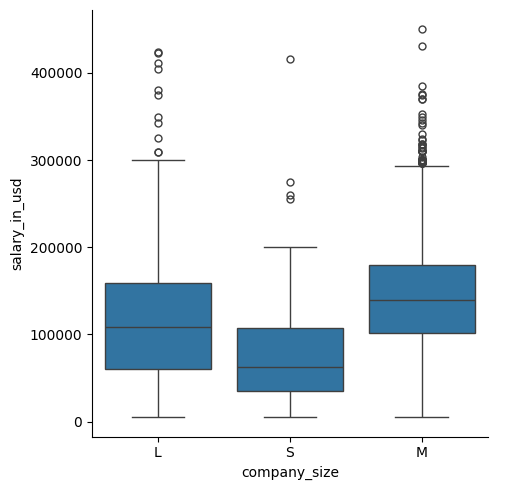

In [10]:
sns.catplot(data=df, x="company_size", y="salary_in_usd", kind="box")

cat = [col for col in df.columns if df[col].dtype=='object']
for col in cat:
  # print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')
  print(f'A variável "{col}" possui {df[col].nunique()} valores únicos')

print()
ordered_job_title = dict(df.groupby('job_title')['salary_in_usd'].median().sort_values())
ordered_job_title = list(ordered_job_title.keys())
job_title_map = {ordered_job_title[i]: i+1 for i in range(len(ordered_job_title))}
print(job_title_map)



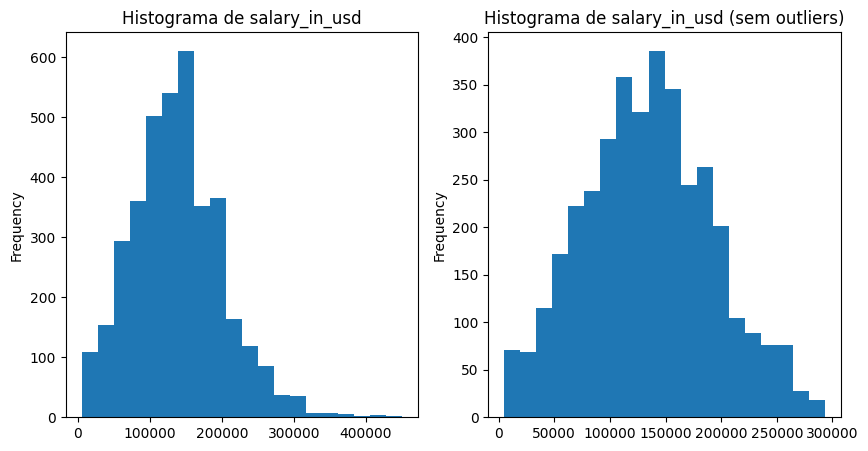

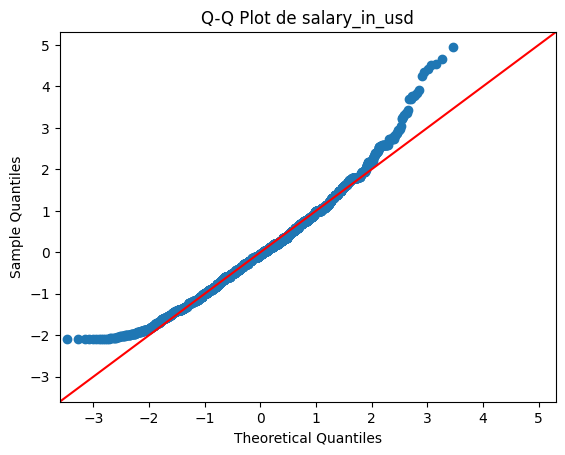

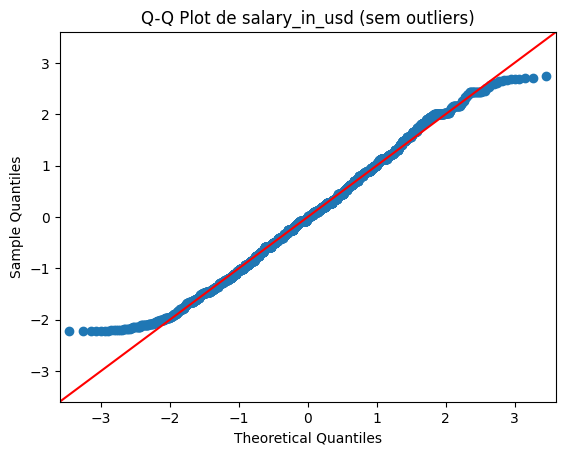

Para a distribuição de salários em USD
W=0.9827, p-valor=5.132455405327159e-21
Há evidências suficientes para rejeitar a hipótese de normalidade.
Para a distribuição de salários em USD (sem outliers)
W=0.9940, p-valor=2.7365635286993262e-11
Há evidências suficientes para rejeitar a hipótese de normalidade.


In [11]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize=(10, 5))

plt.subplot(121)
df.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd')

plt.subplot(122)
dfSemOutlier.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd (sem outliers)')

sm.qqplot(df['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd')

sm.qqplot(dfSemOutlier['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd (sem outliers)')

plt.show()



# Teste de Shapiro-Wilk para checar normalidade

alpha = .05
shapiro_test = stats.shapiro(df['salary_in_usd'])

print("Para a distribuição de salários em USD")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")


shapiro_test = stats.shapiro(dfSemOutlier['salary_in_usd'])

print("Para a distribuição de salários em USD (sem outliers)")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")

# Portanto, não podemos utilizar ANOVA para a feature selection, já que esta assume premissa de normalidade.
# Buscar outros testes para a feature selection que não assumam premissa de normalidade.



Como não decidimos utilizar ANOVA, utilizaremos K-Fold-Target-Encoder para transformar nosso dados categóricos em valores numéricos, o que vai nos permitir encontrar a correlação das features em relação ao target utilizando Spearman o Pearson.

In [12]:
from sklearn.preprocessing import TargetEncoder

enconder = TargetEncoder(target_type='continuous', smooth=1,cv=1000, shuffle=True)


def roda_target(df):
  cat = [col for col in df.columns if df[col].dtype=='object']
  print(cat)

  for col in cat:
    x = df[[col]]
    y = df['salary_in_usd']
    x_trans = enconder.fit_transform(x,y)
    df[[col]] = x_trans

  return df

df = roda_target(df)
df.head(5)

dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]

dfSemOutlier.head(5)



['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,153090.816408,138343.297875,204639.592409,62500.826343,85847,61110.103928,100,58347.647963,118476.061452
1,2023,104478.761897,124200.479419,161515.827088,149465.865542,30000,152834.245109,100,151851.781723,78953.570280
2,2023,104665.195510,124653.503918,161649.665512,149439.779732,25500,152856.773480,100,151880.547272,78398.301429
3,2023,153059.006895,138339.381892,140825.194292,149357.236776,175000,131782.785093,100,131487.014123,143152.073786
4,2023,153058.076530,138290.778090,140890.633995,149363.168193,120000,132429.993605,100,132120.010612,143141.189022


Agora, o primeiro passo para realizarmos feature selection é utilizarmos correlação de Pearson. Não utilizamos correlação de Spearman pois, como vimos anteriormente, os valores dos outliers não são discrepantes nesse dataset.
Abaixo, vemos um heatmap com as correlações entre todas as colunas. É importante perceber que, existem 3 colunas que possuem uma correlação muito alta entre si (para os padrões do dataset). Estas são company_location, employee_residence e salary_currency, o que pode indicar que devemos utilizar apenas uma delas, já que teríamos informação redundante caso contrário.

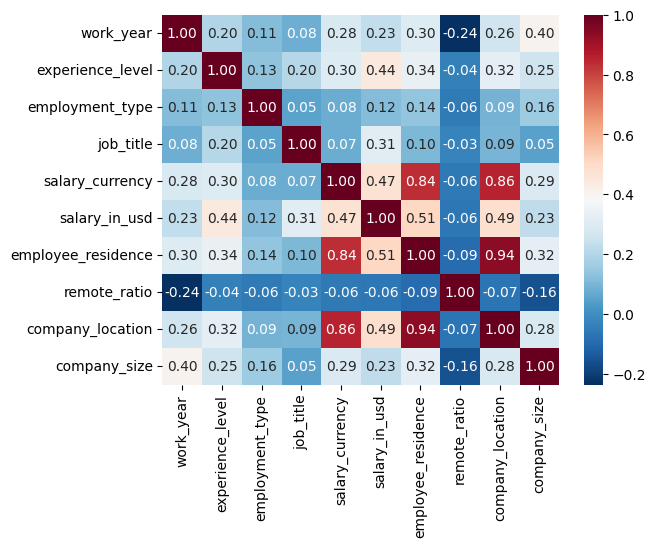

In [13]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True, cmap='RdBu_r', fmt='.2f')
plt.show()

Abaixo, vemos os índices de correlação em relação à variável dependente. Percebemos que há 5 features que apresentam um índice de correlação razoável.

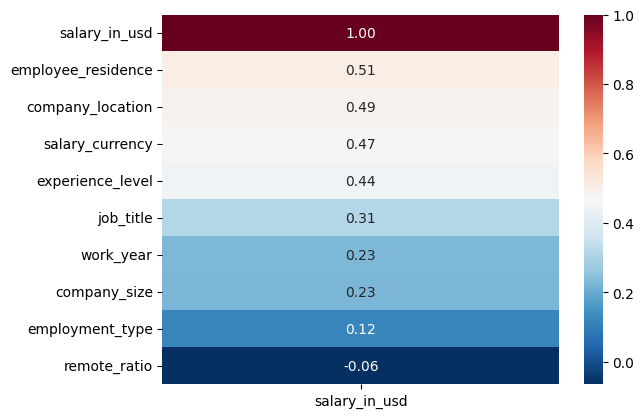

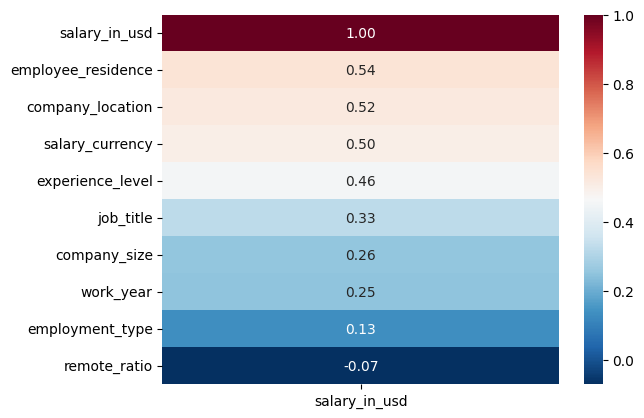

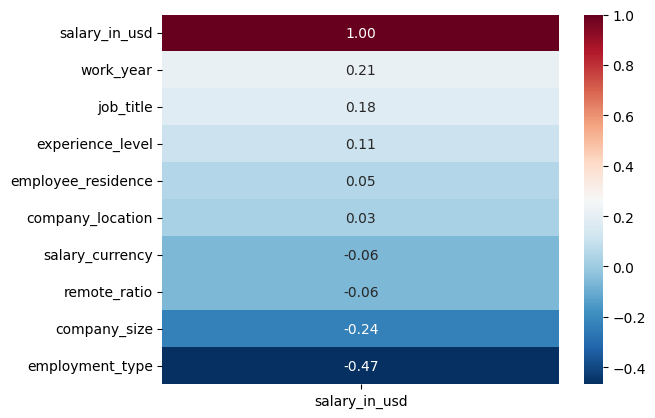

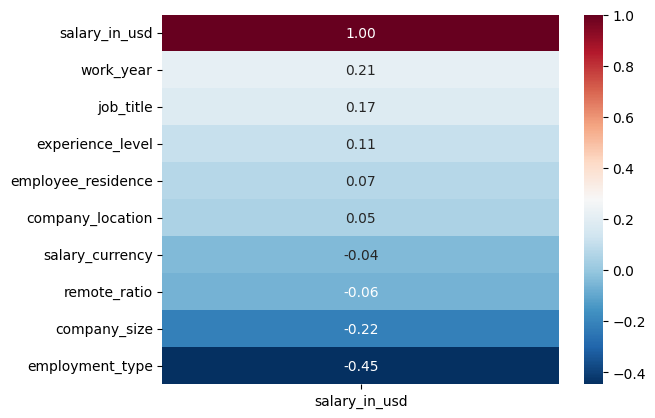

In [14]:
def plota_corr(metodo, df):
  corr = df.corr(method=metodo)
  salario_in_usd_corr = corr['salary_in_usd']
  sns.heatmap(salario_in_usd_corr.sort_values(ascending=False).to_frame(),annot=True, cmap='RdBu_r', fmt='.2f')
  plt.show()

plota_corr('pearson', df)
plota_corr('pearson', dfSemOutlier)
plota_corr('spearman', df)
plota_corr('spearman', dfSemOutlier)

Dessa forma, selecionaremos apenas 1 feature dentre as 3 que possuem índice de correlação alto entre si. Dentre essas 3, selecionamos employee residence, já que possui a maior correlação com a feature principal. Além disso, selecionamos as features experience_level e job_title, ambas com índice maior que 0.3.

In [15]:

dfSelecionado = df[['employee_residence','experience_level' ,'job_title','company_size', 'salary_in_usd']]
dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,61110.103928,153090.816408,204639.592409,118476.061452,85847
1,152834.245109,104478.761897,161515.827088,78953.570280,30000
2,152856.773480,104665.195510,161649.665512,78398.301429,25500
3,131782.785093,153059.006895,140825.194292,143152.073786,175000
4,132429.993605,153058.076530,140890.633995,143141.189022,120000


Normalizando os dados, temos:

In [16]:
# Supondo que df já está carregado


scaler = MinMaxScaler()

# dfNormalizado = df[['employee_residence','experience_level' ,'job_title','company_size']]

dfSelecionado = pd.DataFrame(scaler.fit_transform(dfSelecionado), columns=dfSelecionado.columns)
# dfSelecionado = pd.concat([dfNormalizado, df[['salary_in_usd']]], axis=1)

dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,0.204988,0.636421,0.707680,0.629879,0.181436
1,0.896754,0.224584,0.518590,0.038999,0.055900
2,0.896924,0.226163,0.519177,0.030698,0.045784
3,0.737988,0.636151,0.427865,0.998797,0.381839
4,0.742869,0.636143,0.428152,0.998634,0.258207


Dado que terminamos nossa seleção de features, podemos começar a realizar o treinamento do nosso modelo.

In [17]:
X = dfSelecionado.drop('salary_in_usd', axis=1)
y = dfSelecionado['salary_in_usd']

# Model
reg = LinearRegression()

# K-Fold config
kf = KFold(n_splits=100, shuffle=True, random_state=42)

# R² scores
r2_scores = cross_val_score(reg, X, y, cv=kf, scoring='r2')

# MSE scores (need custom scorer)
mse_scores = cross_val_score(
    reg,
    X,
    y,
    cv=kf,
    scoring=make_scorer(mean_squared_error)
)

# print("R² scores:", r2_scores)
print("R² médio:", np.mean(r2_scores))

# print("\nMSE scores:", mse_scores)
print("MSE médio:", np.mean(mse_scores))

R² médio: 0.37302000996596674
MSE médio: 0.0123161313108129


### Modelo de Redes Neurais

In [18]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Configura o k-fold
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Armazenar as métricas de erro (quadrático e absoluto)
mse_scores = []
mae_scores = []
r2_scores = []

# Criar a arquitetura da rede neural
def create_model():
    model = Sequential([
        Dense(4*X.shape[1], activation='relu', input_shape=(X.shape[1],)),
        Dense(2*X.shape[1], activation='relu'),
        Dense(1) # Camada de saída para regressão
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

n_epochs=100

# Itera sobre os folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Criar e treinar o modelo
    model = create_model()
    model.fit(X_train, y_train, epochs=n_epochs, verbose=0) # verbose=0 para não exibir o progresso

    # Avaliar o modelo
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Calcular e exibe o desempenho médio
print(f"Resultados do EQM por fold: {mse_scores}")
print(f"EQM médio: {np.mean(mse_scores)}")
print(f"Desvio padrão do EQM: {np.std(mse_scores)}")

print(f"EAM médio: {np.mean(mae_scores)}")
print(f"Desvio padrão do EAM: {np.std(mae_scores)}")

print(f"R^2 score médio: {np.mean(r2_scores)}")
print(f"Desvio padrão do R^2 score: {np.std(r2_scores)}")


# Hiperparâmetros ajustáveis: Número de camadas, neurônios, épocas, e quantidade de folds no k-fold

c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\sylvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Resultados do EQM por fold: [0.01322999919721341, 0.010349198857902963, 0.01360976690047164, 0.013734962383419319, 0.01158351145670219, 0.014814964909680737, 0.011165945290755019, 0.013113707958834549, 0.009769597477636754, 0.010759790045350904]
EQM médio: 0.01221314444779675
Desvio padrão do EQM: 0.0016103254265444368
EAM médio: 0.0824784317873033
Desvio padrão do EAM: 0.00447175613077638
R^2 score médio: 0.3913682390675675
Desvio padrão do R^2 score: 0.05972042610631807


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

poly_reg_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])

kf_100 = KFold(n_splits=100, shuffle=True, random_state=42)

# R²
r2_scores = cross_val_score(poly_reg_model, X, y, cv=kf_100, scoring='r2')

# MSE
mse_scores = cross_val_score(
    poly_reg_model,
    X,
    y,
    cv=kf_100,
    scoring=make_scorer(mean_squared_error)
)

print("R² médio:", np.mean(r2_scores))
print("MSE médio:", np.mean(mse_scores))

R² médio: 0.3864126253198495
MSE médio: 0.012021768292620902


In [33]:
from catboost import CatBoostRegressor

kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

model_cb = CatBoostRegressor(
    depth=8,
    learning_rate=0.1,
    iterations=100,
    verbose=False
)

r2_cb = cross_val_score(model_cb, X, y, cv=kf_10, scoring="r2")
mse_cb = cross_val_score(model_cb, X, y, cv=kf_10, scoring=make_scorer(mean_squared_error))

print("R² médio:", np.mean(r2_cb))
print("MSE médio:", np.mean(mse_cb))

R² médio: 0.7579977948425978
MSE médio: 0.00484587291266224


In [24]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

r2_rf = cross_val_score(model_rf, X, y, cv=kf_10, scoring="r2")
mse_rf = cross_val_score(model_rf, X, y, cv=kf_10, scoring=make_scorer(mean_squared_error))

print("R² médio:", np.mean(r2_rf))
print("MSE médio:", np.mean(mse_rf))

R² médio: 0.7583207738904935
MSE médio: 0.004825115778488792


In [26]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6)

r2_xgb = cross_val_score(model_xgb, X, y, cv=kf_10, scoring="r2")
mse_xgb = cross_val_score(model_xgb, X, y, cv=kf_10, scoring=make_scorer(mean_squared_error))

print("R² médio:", np.mean(r2_xgb))
print("MSE médio:", np.mean(mse_xgb))

R² médio: 0.7895506835262343
MSE médio: 0.004202412836348349


In [ ]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=500)

r2_lgbm = cross_val_score(model_lgbm, X, y, cv=kf_10, scoring="r2")
mse_lgbm = cross_val_score(model_lgbm, X, y, cv=kf_10, scoring=make_scorer(mean_squared_error))

print("R² médio:", np.mean(r2_lgbm))
print("MSE médio:", np.mean(mse_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.297191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.299251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

model_svr = Pipeline([
    ('scale', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
])

r2_svr = cross_val_score(model_svr, X, y, cv=kf_10, scoring="r2")
mse_svr = cross_val_score(model_svr, X, y, cv=kf_10, scoring=make_scorer(mean_squared_error))

print("R² médio:", np.mean(r2_svr))
print("MSE médio:", np.mean(mse_svr))

R² médio: 0.42552566486426774
MSE médio: 0.011511378438039618


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

model_knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ))
])

model_bayes = Pipeline([
    ('scale', StandardScaler()),
    ('bayes', BayesianRidge())
])


In [ ]:
def run_100_times_fold(model, n_splits):
    r2 = 0
    mse = 0
    for i in range(100):
        kfold_i = KFold(n_splits=n_splits, shuffle=True, random_state=i)
        cur_r2 = cross_val_score(model, X, y, cv=kfold_i, scoring="r2")
        cur_mse = cross_val_score(model, X, y, cv=kfold_i, scoring=make_scorer(mean_squared_error))
        r2 += np.mean(cur_r2)
        mse += np.mean(cur_mse)

    print("R² médio:", r2/100)
    print("MSE médio:", mse/100)


print("Resultados do KNNRegressor: ")
run_100_times_fold(model_knn, 10)
print("Resultados do BayesianRidge: ")
run_100_times_fold(model_bayes, 10)

R² médio: 0.6917290171660285
MSE médio: 0.006185424877072809
R² médio: 0.3854904617520225
MSE médio: 0.012324030337337812


R² médio: 0.38537576547904273
MSE médio: 0.01232662480061947
